In [40]:
# Prepare notebook
from pathlib import Path
import os
import sys; sys.path.append(Path(os.getcwd()).parent.parent)
from ej.fixes.jupyter_notebooks import fix; fix()

# Autoreload
%load_ext autoreload
%autoreload 1

# Imports
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import qgrid

# Modules
qgrid.enable()
%aimport ej_math.data_analysis
%aimport ej_math.vote_data

from ej_math.data_analysis import *
from ej_math.vote_data import *

Preparing EJ-Server for executing notebooks
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


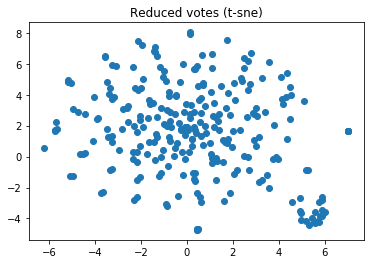

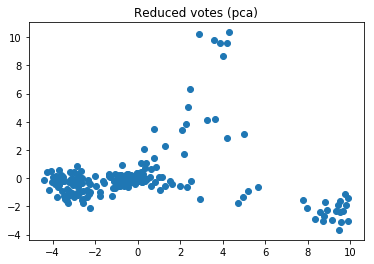

In [41]:
# Create random votes
cluster_sizes = [10, 50, 200, 20]
votes = random_votes(
    sizes=cluster_sizes, 
    n_comments=150, 
    alpha=0.5,
    missing=0.9,
)

# Show data
show_votes(votes, 't-sne')
show_votes(votes, 'pca')

In [42]:
# Show compiled comment statistics
data = read_data(votes, pivot=True)
data.comments(pc=True)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [43]:
# Show compiled user statistics
data.user_labels = data.clusters(4)[0]
data.users(pc=True)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

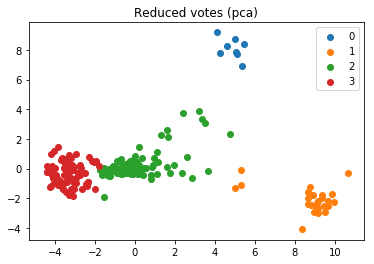

In [13]:
show_votes(data.pivot, labels=data.clusters(4)[0])

In [37]:
import surprise
from surprise.data import train_test_split

algo = surprise.KNNWithMeans(8, sim_options={'user_based': True})
trainset, testset = train_test_split(dataset, test_size=.333)
algo.fit(dataset.build_full_trainset())
predictions = algo.test(testset)
accuracy.rmse(predictions)

ModuleNotFoundError: No module named 'surprise.data'

In [5]:
true_labels = sizes_to_labels(cluster_sizes)
k = 4

data_list = [
    data.fill(),
    data.fill(type='knn-means'),
    data.fill(type='knn-baseline'),
    data.fill(type='knn-zscore'),
    data.fill(type='svd'),
    data.fill(type='nmf'),
    data.fill(type='svd++'),
    data.fill(round=True),
]

[x.compare_labels(true_labels, k) for x in data_list]
[x.compare_labels(true_labels, k, 'mutual-information') for x in data_list]
[x.compare_labels(true_labels, k, 'rand') for x in data_list]

TypeError: object of type 'NoneType' has no len()

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(4)
probs = lda.fit_transform(data.fill().pivot)

In [17]:
data.opinion_bridge_index()

AttributeError: 'VoteData' object has no attribute 'opinion_bridge_index'

In [18]:
labels = data.clusters(4)[0]
true_labels = sizes_to_labels(cluster_sizes)

cluster_error(labels, true_labels)

0.010869565217391304

In [19]:
from ej.ej_math.math.kmeans import euclidean_distance as distance, compute_centroids

labels = true_labels
df = data.pivot

labels = np.asarray(labels)
label_set = sorted(np.unique(labels))
k = len(label_set)
n_samples, _ = df.shape

x = Imputer().fit_transform(df)
centroids = np.array([np.mean(x[labels == k], 0) for k in label_set])

distances = np.empty([n_samples, k])
for i, sample in enumerate(x):
    for j, centroid in enumerate(centroids):
        if label_set[j] == labels[i]:
            distances[i, j] = float('inf')
        else:
            distances[i, j] = distance(sample, centroid)

trunc = int(min(max(1, 0.05 * len(value)), k))
value = distances.min(axis=1)
indexes = value.argsort()[:trunc]
df.index[indexes]

NameError: name 'value' is not defined

In [20]:
second_closest = distances.argmin(axis=1)
x.drop(columns=['labels']).shape

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [21]:
np.sum(np.array(x.drop(columns=['labels']))[:,:,None] - np.array(mean).T[None, :, :], axis=1)

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [319]:
mean.shape

(4, 150)